<a href="https://colab.research.google.com/github/g8428/TIL/blob/master/220228_nlp_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skip-gram 

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
corpus = "He is the king . The king is royal . She is the royal queen"

In [3]:
raw_sentence = corpus.split(".")
sentences = []
for sentence in raw_sentence:
    sentences.append(sentence.split())

sentences

[['He', 'is', 'the', 'king'],
 ['The', 'king', 'is', 'royal'],
 ['She', 'is', 'the', 'royal', 'queen']]

In [4]:
#훈련 dataset 만들기
data = []
WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        #시작 위치
        start_index = max(word_index - WINDOW_SIZE, 0)
        #끝 위치 : +1은 슬라이싱 때문에
        end_index = min(word_index + WINDOW_SIZE + 1, len(sentence))

        for nb_word in sentence[start_index:word_index]:
            data.append([word, nb_word])

        for nb_word in sentence[word_index + 1:end_index]:
            data.append([word, nb_word])


data

[['He', 'is'],
 ['He', 'the'],
 ['is', 'He'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'He'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['The', 'king'],
 ['The', 'is'],
 ['king', 'The'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'The'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['She', 'is'],
 ['She', 'the'],
 ['is', 'She'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'She'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [5]:
len(data)

34

In [6]:
words = []
for sentence in sentences:
    for word in sentence:
        words.append(word)

words = set(words)
words

{'He', 'She', 'The', 'is', 'king', 'queen', 'royal', 'the'}

In [7]:
word2id = {}
id2word = {}

vocab_size = len(words)

for i, word in enumerate(words):
    word2id[word] = i
    id2word[i] = word

print(word2id)
print(id2word) 

{'is': 0, 'She': 1, 'the': 2, 'king': 3, 'queen': 4, 'The': 5, 'royal': 6, 'He': 7}
{0: 'is', 1: 'She', 2: 'the', 3: 'king', 4: 'queen', 5: 'The', 6: 'royal', 7: 'He'}


In [8]:
def to_one_hot(word_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[word_index] = 1
    return temp

In [9]:
x_train = []
y_train = []

for word in data:
    x_train.append(to_one_hot(word2id[word[0]], vocab_size))
    y_train.append(to_one_hot(word2id[word[1]], vocab_size))

In [10]:
x_train

[array([0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.

In [11]:
x_train = np.asarray(x_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)

In [12]:
x_train.shape

(34, 8)

In [13]:
class Word2Vec:
    def __init__(self, vocab_size=10, embedding_dim=5, optimizer='sgd', epochs=100, learning_rate=0.01):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.epochs = epochs

        if optimizer == 'adam':
            self.optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        else:
            self.optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

        self.W1 = tf.Variable(tf.random.normal([self.vocab_size, self.embedding_dim]))
        self.b1 = tf.Variable(tf.random.normal([self.embedding_dim]))

        self.W2 = tf.Variable(tf.random.normal([self.embedding_dim, self.vocab_size]))
        self.b2 = tf.Variable(tf.random.normal([self.vocab_size]))

    def vectorized(self, word_index):
        return (self.W1 + self.b1)[word_index]

    def train(self, x_train, y_train):
        for i in range(self.epochs):
            with tf.GradientTape() as tape:
                #XW + b
                hidden_layer = tf.add(tf.matmul(x_train, self.W1), self.b1)
                output_layer = tf.add(tf.matmul(hidden_layer, self.W2), self.b2)

                #outputd은 logit 
                pred = tf.nn.softmax(output_layer)
                #cross entropy 계산
                loss = tf.reduce_mean(-tf.math.reduce_sum(y_train * tf.math.log(pred), axis=[1]))

                #각 파라미터에 대한 gradient 계산
                grads = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2])
                #각 파라미터를 업데이트
                self.optimizer.apply_gradients(zip(grads, [self.W1, self.b1, self.W2, self.b2]))

            if i % 1000 == 0:
                print(loss)

In [14]:
w2v = Word2Vec(vocab_size=vocab_size, embedding_dim=5, optimizer='adam', epochs=10000, learning_rate=0.1)
w2v.train(x_train, y_train)

tf.Tensor(7.3294916, shape=(), dtype=float32)
tf.Tensor(1.3741236, shape=(), dtype=float32)
tf.Tensor(1.3740875, shape=(), dtype=float32)
tf.Tensor(1.3741199, shape=(), dtype=float32)
tf.Tensor(1.3741095, shape=(), dtype=float32)
tf.Tensor(1.3741674, shape=(), dtype=float32)
tf.Tensor(1.3786724, shape=(), dtype=float32)
tf.Tensor(1.3741308, shape=(), dtype=float32)
tf.Tensor(1.3741, shape=(), dtype=float32)
tf.Tensor(1.3741169, shape=(), dtype=float32)


In [15]:
word2id

{'He': 7,
 'She': 1,
 'The': 5,
 'is': 0,
 'king': 3,
 'queen': 4,
 'royal': 6,
 'the': 2}

In [16]:
w2v.vectorized(word2id['queen']).numpy()

array([1.0966665 , 1.7576188 , 2.0159726 , 0.85318756, 3.841556  ],
      dtype=float32)

In [17]:
# 현재 결과값 5차원, 시각화 하려면 2차원 차원축소 필요
from sklearn.manifold import TSNE
from sklearn import preprocessing

vector = w2v.W1 + w2v.b1

model = TSNE(n_components=2, random_state=42)
vectors = model.fit_transform(vector)

normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors, 'l2')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


is [ 0.787192   -0.61670804]
She [-0.82485855  0.56533927]
the [0.94978195 0.31291252]
king [-0.24413551  0.9697411 ]
queen [-0.15563494  0.98781466]
The [-0.2925513  -0.95624983]
royal [-0.9756935  -0.21913934]
He [0.45033774 0.89285827]


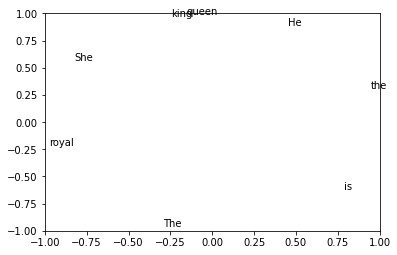

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(left = -1, right = 1)
ax.set_ylim(bottom = -1, top = 1)

for word in words:
    print(word, vectors[word2id[word]])
    ax.annotate(word,(vectors[word2id[word]][0], vectors[word2id[word]][1]))

plt.show()

In [19]:
# 젠심 사용
from gensim.models import Word2Vec

In [ ]:
import pandas as pd

pf = pd.read_csv('/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/news.csv')

In [ ]:
df = pf

In [ ]:
df['content'][:10]

In [ ]:
# 문장분리
sentences = df['content'].apply(lambda x : x.split('.    ')).tolist()
sentences[0]

In [ ]:
# !sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
# !sudo apt-get install python-dev; pip install konlpy     # Python 2.x
# !sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
# !sudo apt-get install curl
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
# pip install konlpy

In [ ]:
from konlpy.tag import Mecab
m = Mecab()

In [ ]:
m.morphs('2005년 10년만기 미국 국채수익률이  연방준비제도이사회(FRB)의 금리인상 지속에 따른 인플레이션 압력 완화로 연 5%를 넘어서기 어려울 것으로 전망됐다')

In [ ]:
 # 젠심으로 학습 진행 - 단어분리
 corpus = [m.morphs(sent) for para in sentences for sent in para]

In [ ]:
#sg : skip-gram
model = Word2Vec(sentences=sentences, size = 100, alpha = 0.025,
                 window = 4, min_count=4, sample = 0.001, sg=1,workers=-1,
                 iter = 100)

In [ ]:
model.save('/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/word2vec.model')

In [ ]:
model = Word2Vec.load('/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/word2vec.model')

In [ ]:
word_embedding = model.wv['금리']